# Prediksi Penyakit Diabetes Dengan Menggunakan Mechine Learning - Algoritma Support Mechine Learning

---

---

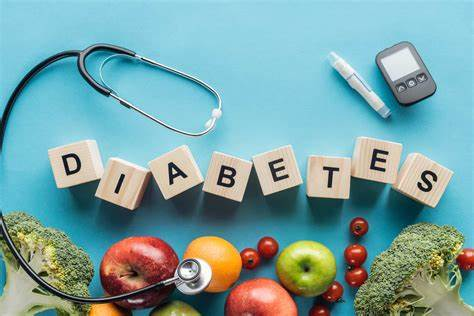

In [105]:
# Import library 

import pandas as pd # digunakan untuk analisis dan manipulasi data
import matplotlib.pyplot as plt # untuk melakukan visualisasi
import seaborn as sns # untuk melakukan visualisasi 


from sklearn.model_selection import train_test_split  # digunakan untuk membagi dataset menjadi dua 
from sklearn.svm import SVC # model yang digunakan
from sklearn.metrics import accuracy_score, classification_report # digunakan untuk mengevaluasi kinerja model klasifikasi
# accuracy_score digunakan untuk menghitung akurasi model
# classification_report digunakan untuk memberi laporan lebih mendetail dari hasil klasifikasi

from sklearn.preprocessing import StandardScaler # digunakan untuk melakukan standardisasi fitur dalam dataset



In [106]:
# import data

data = pd.read_csv('diabetes_dataset.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


---

---

# Understanding Data

In [107]:
# Cek Baris dan kolom

data.shape

(768, 9)

In [108]:
# cek type data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [109]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Claening Data

In [110]:
# cek missing values

data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [111]:
# cek data duplicat

data.duplicated().sum()

np.int64(0)

# Exploratory Data Analysis (EDA)

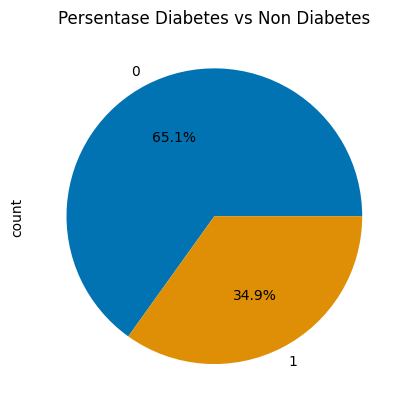

In [112]:
sns.set_palette('colorblind') # digunakan untuk mengatur palet warna 
data['Outcome'].value_counts().plot(kind='pie', autopct = '%1.1f%%')
plt.title('Persentase Diabetes vs Non Diabetes')
plt.show()

In [113]:
def distrisbusion(kolom) :

    plt.figure(figsize=(10,6))

    sns.set_palette(['red','green'])
    sns.kdeplot(data=data[data['Outcome'] == 1][kolom],shade=True,  label='Diabetes')
    sns.kdeplot(data=data[data['Outcome'] == 0][kolom],shade=True, label='Healty')


    plt.title(f"Distribusion of {kolom} by Outcome")
    plt.legend()
    plt.show()


C:\Users\Deon Harefa\AppData\Local\Temp\ipykernel_24144\1186346733.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data[data['Outcome'] == 1][kolom],shade=True,  label='Diabetes')
C:\Users\Deon Harefa\AppData\Local\Temp\ipykernel_24144\1186346733.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data[data['Outcome'] == 0][kolom],shade=True, label='Healty')


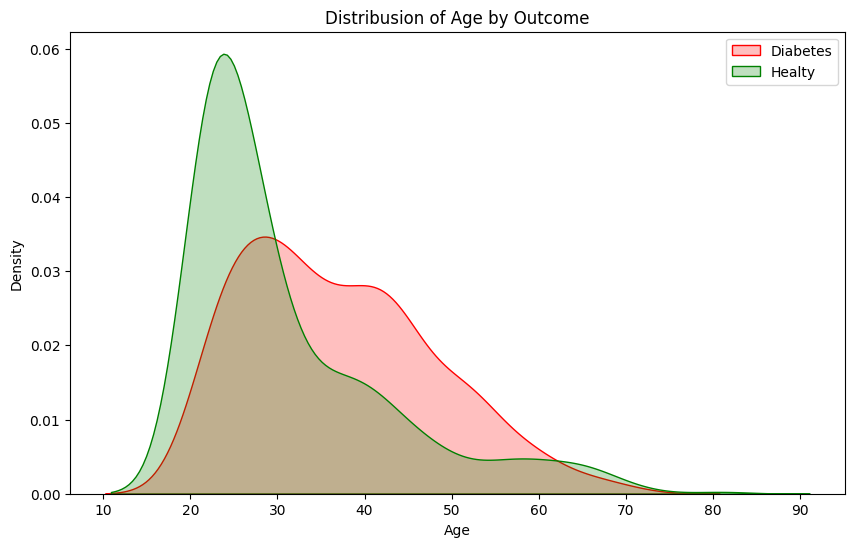

In [114]:
distrisbusion('Age');

C:\Users\Deon Harefa\AppData\Local\Temp\ipykernel_24144\1186346733.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data[data['Outcome'] == 1][kolom],shade=True,  label='Diabetes')
C:\Users\Deon Harefa\AppData\Local\Temp\ipykernel_24144\1186346733.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data[data['Outcome'] == 0][kolom],shade=True, label='Healty')


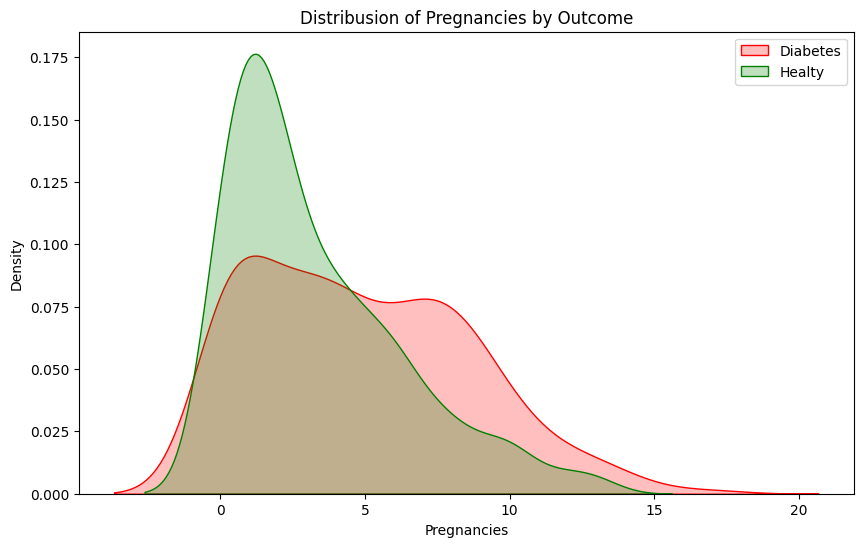

In [115]:
distrisbusion('Pregnancies')

dis

C:\Users\Deon Harefa\AppData\Local\Temp\ipykernel_24144\1186346733.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data[data['Outcome'] == 1][kolom],shade=True,  label='Diabetes')
C:\Users\Deon Harefa\AppData\Local\Temp\ipykernel_24144\1186346733.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data[data['Outcome'] == 0][kolom],shade=True, label='Healty')


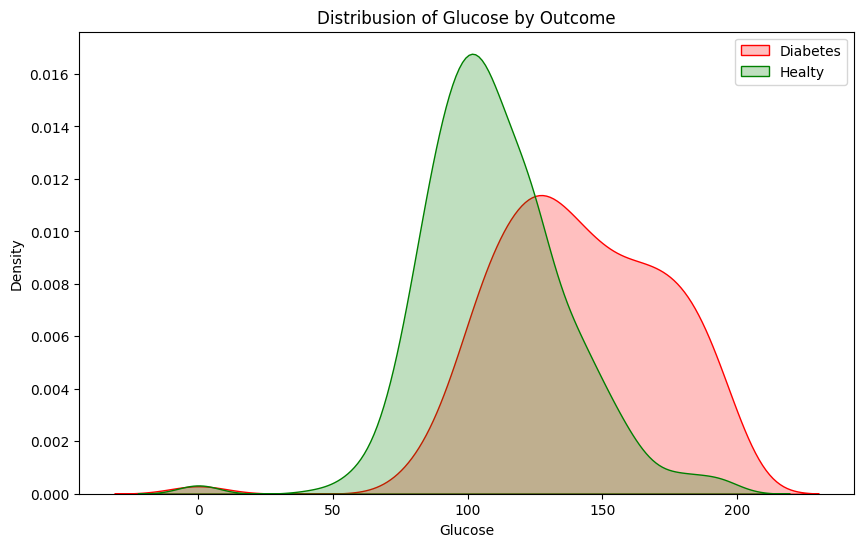

In [116]:
distrisbusion('Glucose')

C:\Users\Deon Harefa\AppData\Local\Temp\ipykernel_24144\1186346733.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data[data['Outcome'] == 1][kolom],shade=True,  label='Diabetes')
C:\Users\Deon Harefa\AppData\Local\Temp\ipykernel_24144\1186346733.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data[data['Outcome'] == 0][kolom],shade=True, label='Healty')


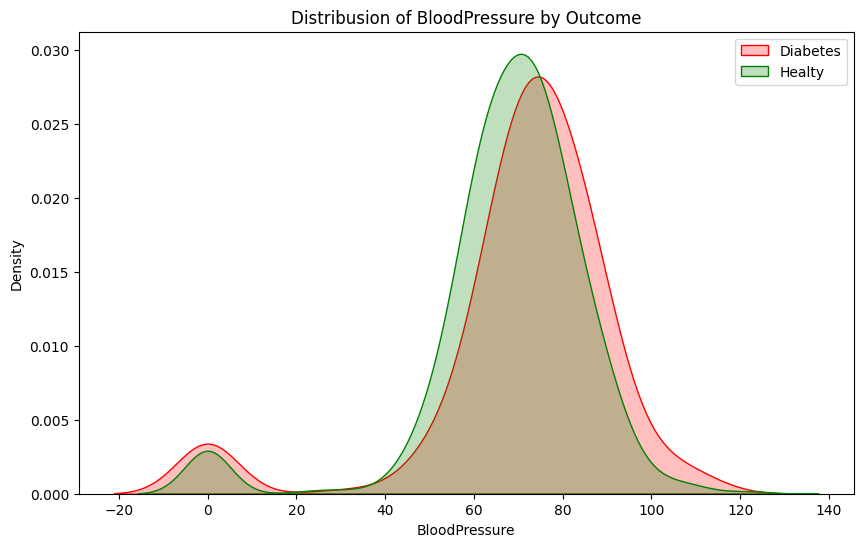

In [117]:
distrisbusion('BloodPressure')

In [118]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

C:\Users\Deon Harefa\AppData\Local\Temp\ipykernel_24144\1186346733.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data[data['Outcome'] == 1][kolom],shade=True,  label='Diabetes')
C:\Users\Deon Harefa\AppData\Local\Temp\ipykernel_24144\1186346733.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data[data['Outcome'] == 0][kolom],shade=True, label='Healty')


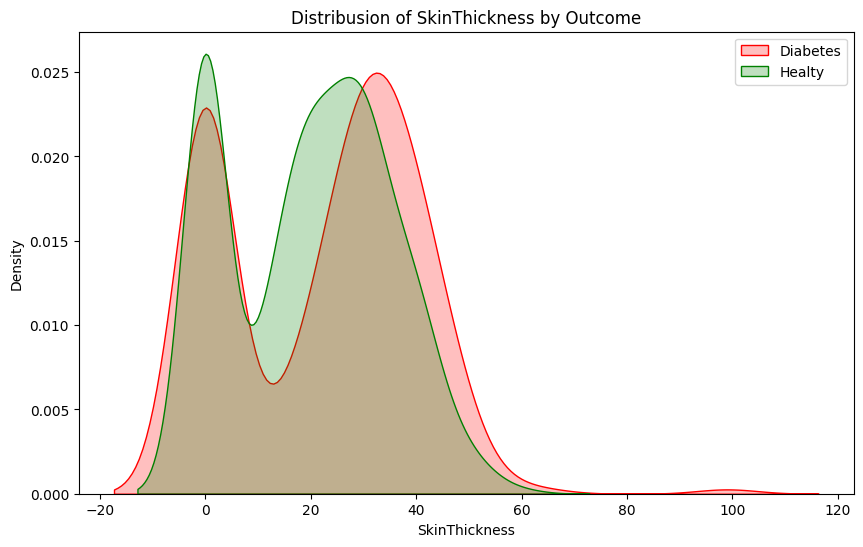

In [119]:
distrisbusion('SkinThickness')

C:\Users\Deon Harefa\AppData\Local\Temp\ipykernel_24144\1186346733.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data[data['Outcome'] == 1][kolom],shade=True,  label='Diabetes')
C:\Users\Deon Harefa\AppData\Local\Temp\ipykernel_24144\1186346733.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data[data['Outcome'] == 0][kolom],shade=True, label='Healty')


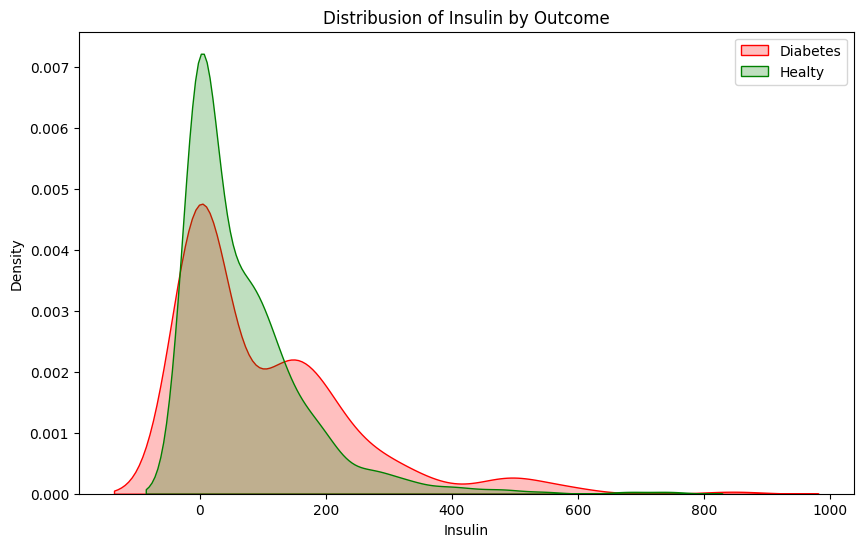

In [120]:
distrisbusion('Insulin')

C:\Users\Deon Harefa\AppData\Local\Temp\ipykernel_24144\1186346733.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data[data['Outcome'] == 1][kolom],shade=True,  label='Diabetes')
C:\Users\Deon Harefa\AppData\Local\Temp\ipykernel_24144\1186346733.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data[data['Outcome'] == 0][kolom],shade=True, label='Healty')


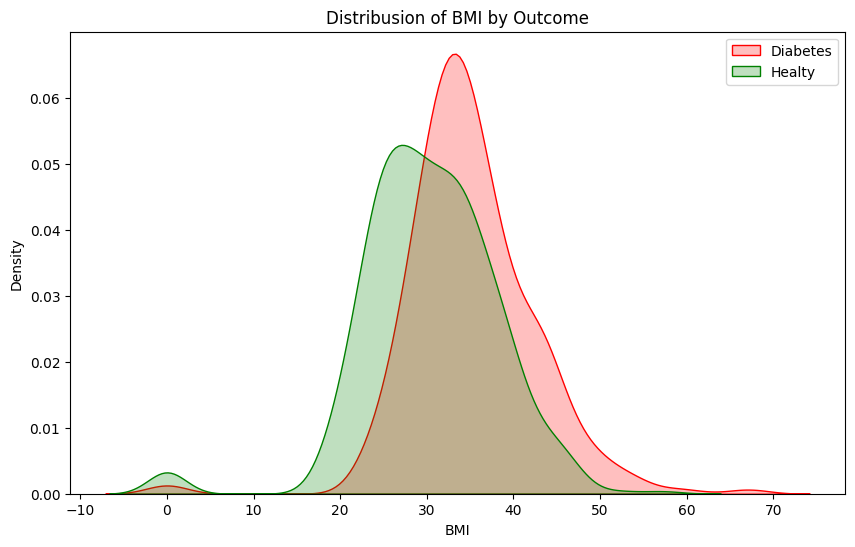

In [121]:
distrisbusion('BMI')

- Corelation Analysis

Text(0.5, 1.0, 'Korelasi Antar Kolom')

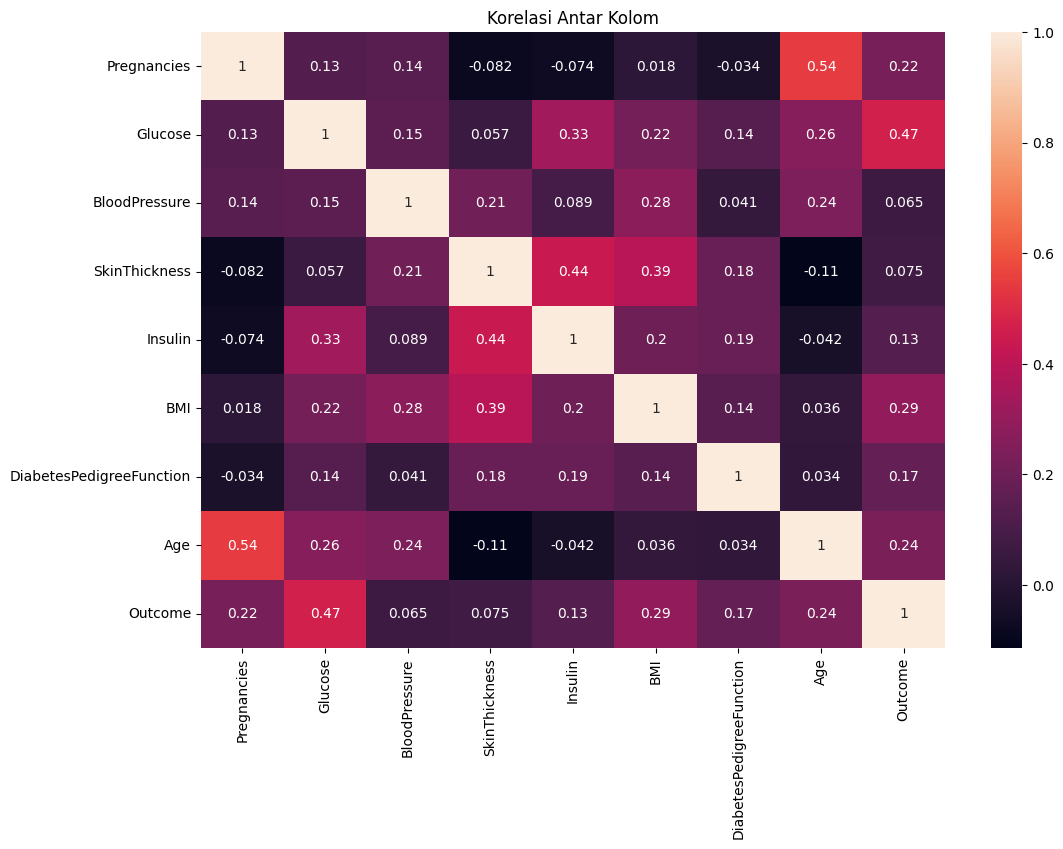

In [122]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True)

plt.title("Korelasi Antar Kolom")

# Preparation Data

In [123]:
# Memisahkan dataset menjadi dua bagian

x = data.drop('Outcome', axis = 1) # dataset/datalatih
y = data['Outcome'] # label target

In [124]:
scaler = StandardScaler()
# StandardScaler --> digunakan untuk menstandarisasi fitur

scaler.fit(x) # menghitung standarisasi dari data yng diberikan ( Mean & Standar deviasi)
# fit() --> digunakan untuk menghitung dan menyimpan parameter yang diperlukan oleh data

StandardScaler()

In [125]:
x = scaler.transform(x) # digunakan untuk menerapkan transformasi skala pada data x berdasarkan parameter yang telah dihitung sebelumnya oleh objek scaler.
# transform --> digunakan untuk menerapkan transformasi tertentu pada input

In [126]:
# Membagi dataset menjadi data pelatihan dan data pengujian

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

# Modeling & Evalution

In [127]:
model = SVC(kernel = 'linear') # model yang digunakan adalah SVC 
# kernel = 'linear' --> Menentukan bahwa model akan menggunakan fungsi kernel linier, yang cocok untuk data yang dapat dipisahkan secara linier


model.fit(x_train,y_train) # melatih model dengan data pelatihan 

SVC(kernel='linear')

In [128]:
predicition = model.predict(x_test) # melakukan prediksi terhadap data uji dengan model yang telah dilatih 

In [129]:
akurasi = accuracy_score(predicition,y_test) # Menghitung akurasi model setelah melakukan prediksi
# accuracy_score --> digunakan untuk mengukur sebarapa baik model klasifikasi dalam melakukan prediksi

- Rumus menghitung akurasi : 

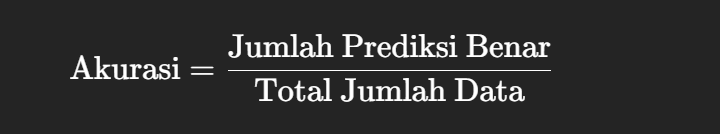

In [130]:
print(classification_report(y_test,predicition))
print('Akursi Model SVM = ', akurasi)

              precision    recall  f1-score   support

           0       0.81      0.82      0.81        99
           1       0.67      0.65      0.66        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154

Akursi Model SVM =  0.7597402597402597
